# Multiclass Support Vector Machine exercise

*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

In this exercise you will:
    
- implement a fully-vectorized **loss function** for the SVM
- implement the fully-vectorized expression for its **analytic gradient**
- **check your implementation** using numerical gradient
- use a validation set to **tune the learning rate and regularization** strength
- **optimize** the loss function with **SGD**
- **visualize** the final learned weights

In [2]:
# Run some setup code
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# bool var. to let program show debug info.
debug = True
show_img = True

## CIFAR-10 Data Loading and Preprocessing

In [3]:
import cifar10
# Load the raw CIFAR-10 data
X, y, X_test, y_test = cifar10.load('../cifar-10-batches-py', debug = debug)

Cifar-10 dataset has been loaded
X shape (50000, 32, 32, 3)
y shape (50000,)
X_test shape (10000, 32, 32, 3)
y_test shape (10000,)


In [ ]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
if show_img:
    cifar10.show(X, y)

Data has been splited.
X shape (49000, 32, 32, 3)
y shape (49000,)
X_val shape (1000, 32, 32, 3)
y_val shape (1000,)
X_test shape (1000, 32, 32, 3)
y_test shape (1000,)
X_dev shape (500, 32, 32, 3)
y_dev shape (500,)
Data has been reshaped.
X shape (49000, 3072)
X_val shape (1000, 3072)
X_test shape (1000, 3072)
X_dev shape (500, 3072)


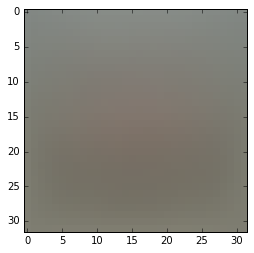

In [4]:
m = 49000
m_val = 1000
m_test = 1000
m_dev = 500

X, y, X_test, y_test, X_dev, y_dev, X_val, y_val = cifar10.split_vec(X, y, X_test, y_test, m, m_test, m_val, m_dev, debug = debug, show_img = show_img)

## SVM Classifier

In [25]:
from svm import SVM
n = X_test.shape[1]
K = 10

# Gradient check it with the function we provided for you.
model = SVM(n, K) 
lamda = 0.0
model.train_check(X_dev, y_dev, lamda)

# do thee gradient check once again with regularization turned on
# you didn't forget the regularization gradient did you?
lamda = 1e2
model.train_check(X_dev, y_dev, lamda)


Gradient check on W
rel. err. 5.18469973511e-09 numerical: -3.23444771437 analytical: -3.23444768083
rel. err. 1.55677584771e-08 numerical: -33.5642369387 analytical: -33.5642358936
rel. err. 1.63261903783e-08 numerical: 9.14380677548 analytical: 9.14380647691
rel. err. 1.34488179891e-08 numerical: -17.314154449 analytical: -17.3141539833
rel. err. 1.53132057952e-08 numerical: 33.2250007347 analytical: 33.2249997172
rel. err. 4.71504552887e-09 numerical: 2.5969588572 analytical: 2.59695883271
rel. err. 1.49097758751e-08 numerical: 18.0245769795 analytical: 18.024576442
rel. err. 1.67213753874e-08 numerical: 17.6633891429 analytical: 17.6633885522
rel. err. 1.4274713547e-08 numerical: 7.68535273474 analytical: 7.68535251533
rel. err. 2.16489244462e-08 numerical: 9.94218844887 analytical: 9.9421880184

Gradient check on b
rel. err. 4.25386921134e-07 numerical: 0.113999999929 analytical: 0.114
rel. err. 2.67387538391e-06 numerical: -0.0240000000318 analytical: -0.0239999
rel. err. 6.1930

### Inline Question 1:
It is possible that once in a while a dimension in the gradcheck will not match exactly. What could such a discrepancy be caused by? Is it a reason for concern? What is a simple example in one dimension where a gradient check could fail? *Hint: the SVM loss function is not strictly speaking differentiable*

**Your Answer:** In SVM loss function, it has a max. function max(0, s). When s is near 0, then the grad. might not match perfectly.

iteration 0 / 1500: loss 17.420503
iteration 100 / 1500: loss 8.029550
iteration 200 / 1500: loss 6.342209
iteration 300 / 1500: loss 5.533874
iteration 400 / 1500: loss 5.113333
iteration 500 / 1500: loss 5.274397
iteration 600 / 1500: loss 5.227377
iteration 700 / 1500: loss 4.887976
iteration 800 / 1500: loss 5.008692
iteration 900 / 1500: loss 5.353317
iteration 1000 / 1500: loss 5.149186
iteration 1100 / 1500: loss 5.434194
iteration 1200 / 1500: loss 5.300806
iteration 1300 / 1500: loss 5.498750
iteration 1400 / 1500: loss 4.983089


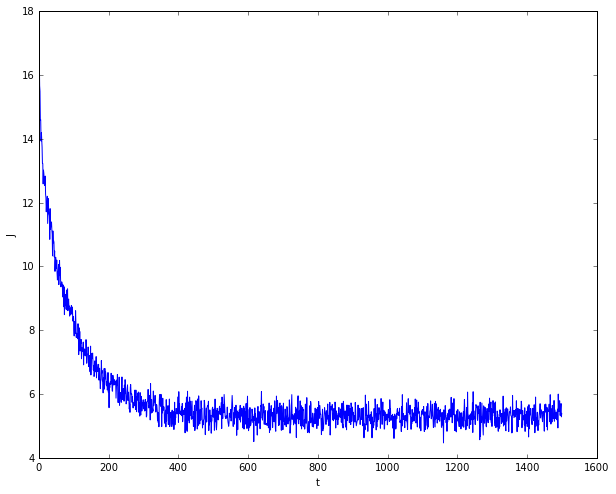

In [6]:
# Next implement the function svm_loss_vectorized; for now only compute the loss;
alpha = 1e-7
lamda = 5e4
T = 1500
B = 256
hpara = (alpha, lamda, T, B)
model.train(X, y, hpara)

In [7]:
# Write the predict function and evaluate the performance on both the
# training and validation set
y_hat = model.predict(X)
print 'training acc:', np.mean(y == y_hat)
y_val_hat = model.predict(X_val)
print 'val. acc:', np.mean(y_val == y_val_hat)

training acc: 0.369510204082
val. acc: 0.38


In [29]:
# Use the validation set to tune hyperparameters (regularization strength and
# learning rate). You should experiment with different ranges for the learning
# rates and regularization strengths; if you are careful you should be able to
# get a classification accuracy of about 0.4 on the validation set.

# results is dictionary mapping tuples of the form
# (learning_rate, regularization_strength) to tuples of the form
# (training_accuracy, validation_accuracy). The accuracy is simply the fraction
# of data points that are correctly classified.
results = {}
best_val = -1
best_model = None
best_hpara = None

# Write code that chooses the best hyperparameters by tuning on the validation 
# set. For each combination of hyperparameters, train a linear SVM on the      
# training set, compute its accuracy on the training and validation sets, and  
# store these numbers in the results dictionary. In addition, store the best   
# validation accuracy in best_val and the LinearSVM object that achieves this  
# accuracy in best_svm.                                                        
#                                                                              
# Hint: You should use a small value for num_iters as you develop your         
# validation code so that the SVMs don't take much time to train; once you are 
# confident that your validation code works, you should rerun the validation   
# code with a larger value for num_iters. 
T = 1500
B = 256
lamda = 3e3
for alpha in [1e-8, 3e-8, 1e-7, 3e-7]:
    model = SVM(n, K)
    hpara = (alpha, lamda, T, B)
    model.train(X, y, hpara, show_img = False, debug = False)
    
    y_hat = model.predict(X)
    train_acc = np.mean(y == y_hat)
    y_val_hat = model.predict(X_val)
    val_acc = np.mean(y_val == y_val_hat)
    results[(alpha, lamda)] = (train_acc, val_acc)
    print 'alpha =', alpha, 'lamda =', lamda, 'train_acc =', train_acc, 'val_acc =', val_acc
    
    if val_acc > best_val:
        best_model = model
        best_val = val_acc
        best_hpara = hpara
    

alpha = 1e-08 lamda = 3000.0 train_acc = 0.366142857143 val_acc = 0.382
alpha = 3e-08 lamda = 3000.0 train_acc = 0.384285714286 val_acc = 0.392
alpha = 1e-07 lamda = 3000.0 train_acc = 0.401469387755 val_acc = 0.404
alpha = 3e-07 lamda = 3000.0 train_acc = 0.395959183673 val_acc = 0.38


In [28]:
# Print out results.
print 'best val. acc.', best_val, 'hpara', best_hpara

best val. acc. 0.404 hpara (1e-07, 3000.0, 1500, 256)


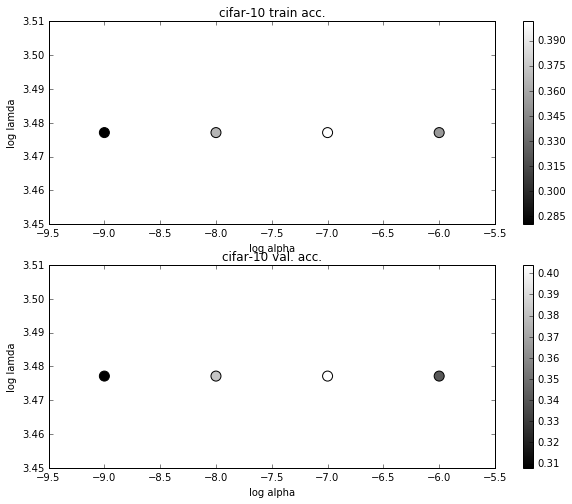

In [21]:
# Visualize the val. results
import math
x_scatter = [math.log10(x[0]) for x in results]
y_scatter = [math.log10(x[1]) for x in results]

# plot train acc.
marker_size = 100
colors = [results[x][0] for x in results]
plt.subplot(2, 1, 1)
plt.scatter(x_scatter, y_scatter, marker_size, c = colors)
plt.colorbar()
plt.xlabel('log alpha')
plt.ylabel('log lamda')
plt.title('cifar-10 train acc.')

# plot val acc.
colors = [results[x][1] for x in results]
plt.subplot(2, 1, 2)
plt.scatter(x_scatter, y_scatter, marker_size, c = colors)
plt.colorbar()
plt.xlabel('log alpha')
plt.ylabel('log lamda')
plt.title('cifar-10 val. acc.')

In [22]:
# Evaluate the best svm on test set
y_test_hat = best_model.predict(X_test)
test_acc = np.mean(y_test == y_test_hat)
print 'best test acc', test_acc

best test acc 0.393


In [30]:
# Visualize the learned alpha for each class
# Depending on your choice of alpha and lamda
# They may be or may not be nice to look at
best_model.visualize_W()

NameError: global name 'best_model' is not defined